In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

In [36]:
dataset=pd.read_csv("ATOC Historical Data.csv",index_col='Date',parse_dates=True)

In [4]:
!pip install --upgrade --user nbconvert

In [37]:
dataset.head()

,Open,High,Low,Close,Volume
Date,,,,,
2021-10-08,133.51,134.50,131.00,132.00,33.20K
2021-10-07,131.50,137.00,131.50,136.14,44.70K
2021-10-06,134.00,134.70,128.00,128.50,26.90K
2021-10-05,137.11,137.11,135.00,136.04,11.70K
2021-10-04,139.99,140.00,139.65,139.88,2.20K


In [38]:
dataset.isna().any()

Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [39]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 984 entries, 2021-10-08 to 2017-10-11
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    984 non-null    float64
 1   High    984 non-null    float64
 2   Low     984 non-null    float64
 3   Close   984 non-null    float64
 4   Volume  984 non-null    object 
dtypes: float64(4), object(1)
memory usage: 46.1+ KB


<AxesSubplot:xlabel='Date'>

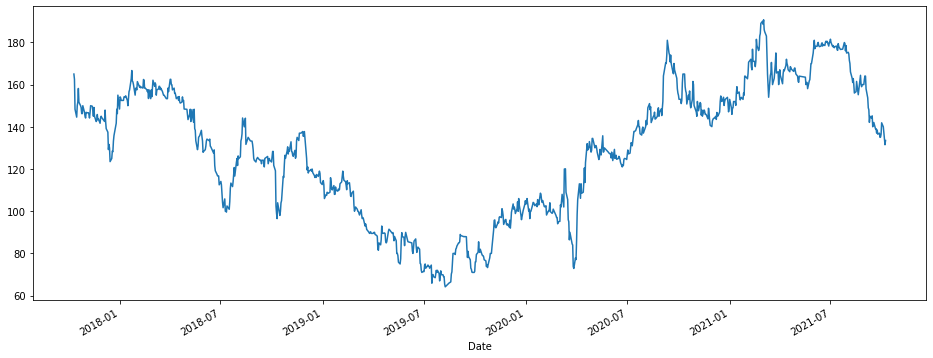

In [40]:
dataset['Open'].plot(figsize=(16,6))

In [41]:
dataset['Volume']=dataset['Volume'].str.replace('K','')
dataset['Volume']=dataset['Volume'].str.replace('M','')
dataset['Volume']=dataset['Volume'].astype(float)

# Rolling Mean

In [42]:
rolling_mean=dataset.rolling(7).mean().head(20)

<AxesSubplot:xlabel='Date'>

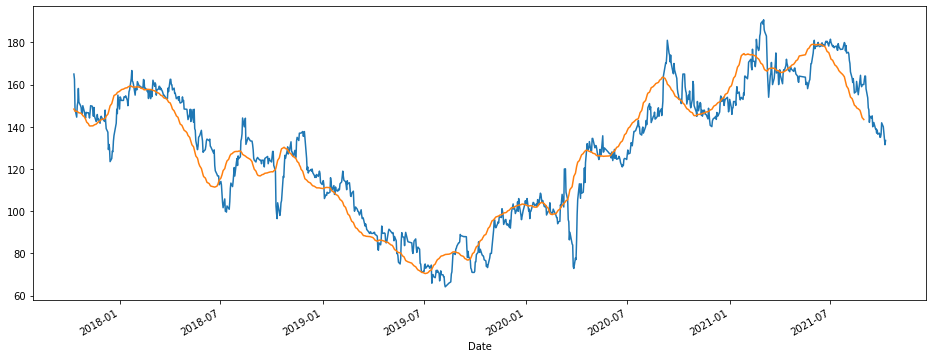

In [43]:
dataset['Open'].plot(figsize=(16,6))
dataset.rolling(window=30).mean()['Close'].plot()

In [44]:
dataset['Cose 30 days mean']=dataset['Close'].rolling(window=30).mean()

In [45]:
dataset.rename({'Cose 30 days mean':'Close 30 days mean'},axis=1,inplace=True)

<AxesSubplot:xlabel='Date'>

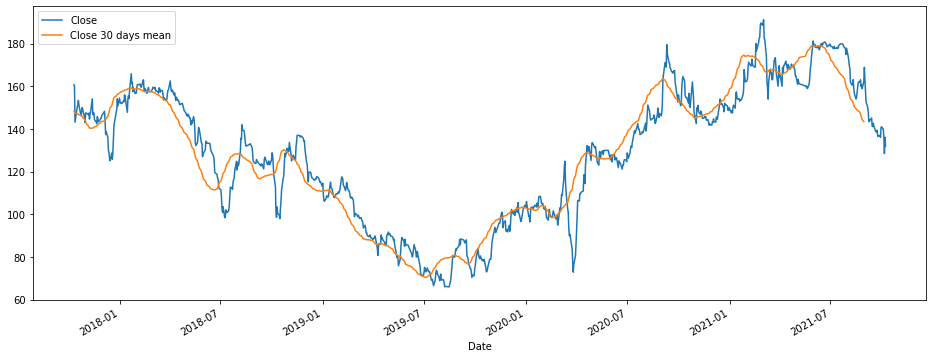

In [46]:
dataset[['Close','Close 30 days mean']].plot(figsize=(16,6))

In [47]:
training_set=dataset['Open']
training_set=pd.DataFrame(training_set)
training_set.head()

,Open
Date,
2021-10-08,133.51
2021-10-07,131.50
2021-10-06,134.00
2021-10-05,137.11
2021-10-04,139.99


### Feature Scaling

In [48]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
training_set_scaled=sc.fit_transform(training_set)
training_set_scaled

array([[0.54801233],
       [0.53212677],
       [0.55188493],
       [0.57646408],
       [0.59922548],
       [0.61432071],
       [0.57164309],
       [0.56057852],
       [0.55978819],
       [0.57559472],
       [0.57164309],
       [0.58744962],
       [0.57567375],
       [0.59219158],
       [0.59148028],
       [0.61511104],
       [0.61511104],
       [0.59938355],
       [0.64032245],
       [0.6309966 ],
       [0.63882083],
       [0.61590137],
       [0.66300482],
       [0.67043389],
       [0.70757923],
       [0.74156327],
       [0.78890382],
       [0.78977318],
       [0.77696989],
       [0.75736979],
       [0.75736979],
       [0.74946653],
       [0.75847625],
       [0.79214416],
       [0.77357149],
       [0.71943413],
       [0.76922469],
       [0.73089386],
       [0.72575674],
       [0.75736979],
       [0.7798941 ],
       [0.76527306],
       [0.78107959],
       [0.80486841],
       [0.83640243],
       [0.84825733],
       [0.87196712],
       [0.878

In [49]:
# 60 days for 1 output i.e output on every 60th day
x_train=[]
y_train=[]
for i in range(60,len(training_set)):
    x_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
x_train=np.array(x_train)
y_trian=np.array(y_train)

In [50]:
x_train.shape

(924, 60)

In [51]:
# reshaping the data, to convert the data into 3 dimension
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(924, 60, 1)

In [52]:
# Building the RNN Model

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [53]:
regressor= Sequential()


## Training the model

In [54]:
# input layer
regressor.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
regressor.add(Dropout(0.2)) 
# droupout is regularization technique for reducing overitting the model

regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))
              
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

In [55]:
# compiling RNN
regressor.compile(optimizer='adam', loss="mean_squared_error")

# fiting RNN to training set
train_x = np.asarray(x_train)
train_y = np.asarray(y_train)
regressor.fit(train_x,train_y,epochs=100,batch_size=32)
# epochs---> frame of time
# batch_size=32 --> no. of training examples utilized in one iteration

Epoch 1/100
29/29 [==============================] - 5s 50ms/step - loss: 0.1219
Epoch 2/100
29/29 [==============================] - 1s 50ms/step - loss: 0.0782
Epoch 3/100
29/29 [==============================] - 1s 50ms/step - loss: 0.0714
Epoch 4/100
29/29 [==============================] - 2s 52ms/step - loss: 0.0679
Epoch 5/100
29/29 [==============================] - 1s 50ms/step - loss: 0.0669
Epoch 6/100
29/29 [==============================] - 1s 51ms/step - loss: 0.0664
Epoch 7/100
29/29 [==============================] - 2s 52ms/step - loss: 0.0664
Epoch 8/100
29/29 [==============================] - 1s 51ms/step - loss: 0.0651
Epoch 9/100
29/29 [==============================] - 1s 51ms/step - loss: 0.0653
Epoch 10/100
29/29 [==============================] - 2s 54ms/step - loss: 0.0648
Epoch 11/100
29/29 [==============================] - 2s 54ms/step - loss: 0.0640
Epoch 12/100
29/29 [==============================] - 2s 52ms/step - loss: 0.0636
Epoch 13/100
29/29 [=====

### Prediction and Visualizations


In [24]:
dataset_test=pd.read_csv("test.csv",index_col='Date',parse_dates=True)

In [25]:
dataset_test.head()

,Open,High,Low,Close,Volume
Date,,,,,
2021-11-10,132.00,134.00,131.40,131.99,14.60K
2021-11-09,137.11,137.11,131.25,131.25,65.40K
2021-11-08,138.17,142.00,138.00,139.75,30.20K
2021-11-05,141.50,144.00,138.10,139.80,47.60K
2021-11-04,140.00,141.98,139.05,139.15,17.60K


In [26]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 21 entries, 2021-11-10 to 2021-10-11
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    21 non-null     float64
 1   High    21 non-null     float64
 2   Low     21 non-null     float64
 3   Close   21 non-null     float64
 4   Volume  21 non-null     object 
dtypes: float64(4), object(1)
memory usage: 1008.0+ bytes


In [27]:
dataset_test['Volume']=dataset_test['Volume'].str.replace('K','')
dataset_test['Volume']=dataset_test['Volume'].str.replace('M','')
dataset_test['Volume']=dataset_test['Volume'].astype(float)

In [28]:
test_set=dataset_test['Open']
test_set=pd.DataFrame(test_set)

In [29]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 21 entries, 2021-11-10 to 2021-10-11
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    21 non-null     float64
dtypes: float64(1)
memory usage: 336.0 bytes


In [30]:
real_stock_price=dataset_test.iloc[:,1:2].values

In [31]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 21 entries, 2021-11-10 to 2021-10-11
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    21 non-null     float64
dtypes: float64(1)
memory usage: 336.0 bytes


In [32]:
complete_dataset=pd.concat((dataset['Open'],dataset_test['Open']),axis=0)
inputs=complete_dataset[len(complete_dataset)-len(dataset_test)-60:].values
inputs=inputs.reshape(-1,1)
inputs=sc.transform(inputs)

X_test=[]
for i in range(60,80):
    X_test.append(inputs[i-60:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_stock_price=regressor.predict(X_test)
predicted_stock_price=sc.inverse_transform(predicted_stock_price)


In [33]:
predicted_stock_price=pd.DataFrame(predicted_stock_price)
predicted_stock_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       20 non-null     float32
dtypes: float32(1)
memory usage: 208.0 bytes


### Visualization fo results

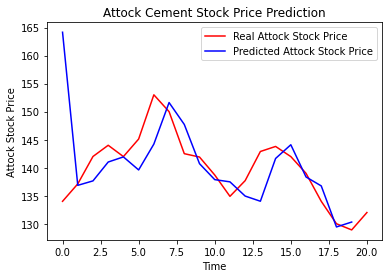

In [34]:
plt.plot(real_stock_price,color='red',label='Real Attock Stock Price')
plt.plot(predicted_stock_price,color='blue',label='Predicted Attock Stock Price')
plt.title("Attock Cement Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Attock Stock Price")
plt.legend()
plt.show()